## Plots for 03 21 Jpillow Meeting

In [1]:
from multiglm.experiments.experiment import load_experiment
from multiglm.visualizations.model_visualizer import *

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_context("talk")
%load_ext autoreload
%autoreload 2

## Two binary columns

In [3]:
experiment_name = "2024_03_20_compare_prev_disengaged_no_filt.pkl"
comp_exp = load_experiment(experiment_name)

In [4]:
mvc = ModelVisualizerCompare(comp_exp)

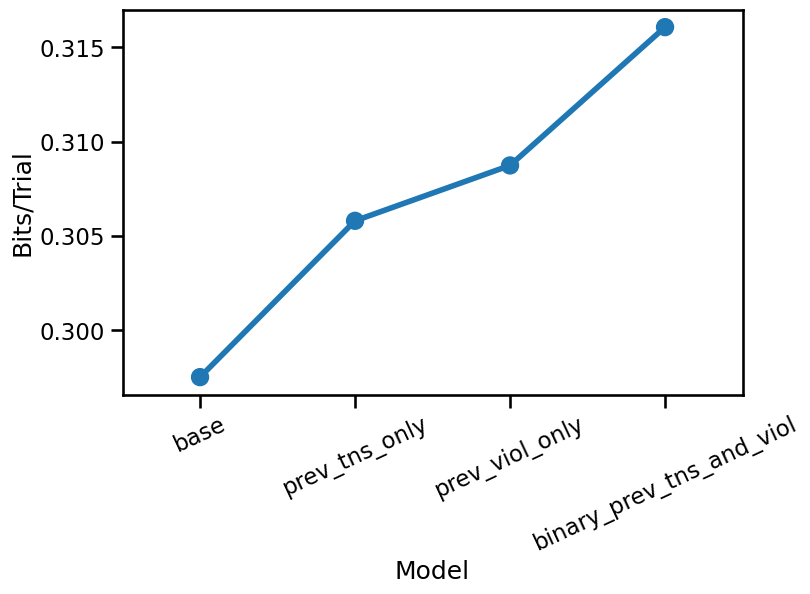

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ORDER = [
    "base",
    "prev_tns_only",
    "prev_viol_only",
    # "filt_prev_viol_only",
    "binary_prev_tns_and_viol",
    # "binary_prev_tns_viol_added",
]
mvc.plot_model_comparison(
    hue=None,
    ax=ax,
    order=ORDER,
    errorbar=None,
)

<Axes: title={'center': 'Model Improvement- mu: 314.16 std: 213.57 \n base -> binary_prev_tns_and_viol'}, xlabel='animal_id', ylabel='Delta test LL (new - base)'>

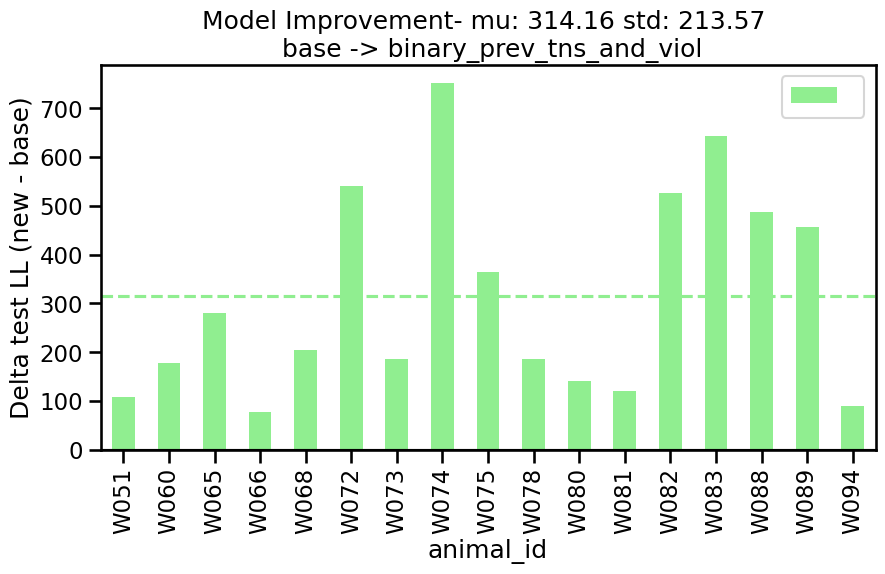

In [10]:
mvc.plot_ll_delta_by_animal(
    base_model_name=ORDER[0],
    new_model_name=ORDER[3],
    type="test",
)

In [12]:
experiment_name = "2024_03_20_tau_sweep_prev_tns.pkl"
tau_sweep = load_experiment(experiment_name)

mvt = ModelVisualizerTauSweep(tau_sweep)

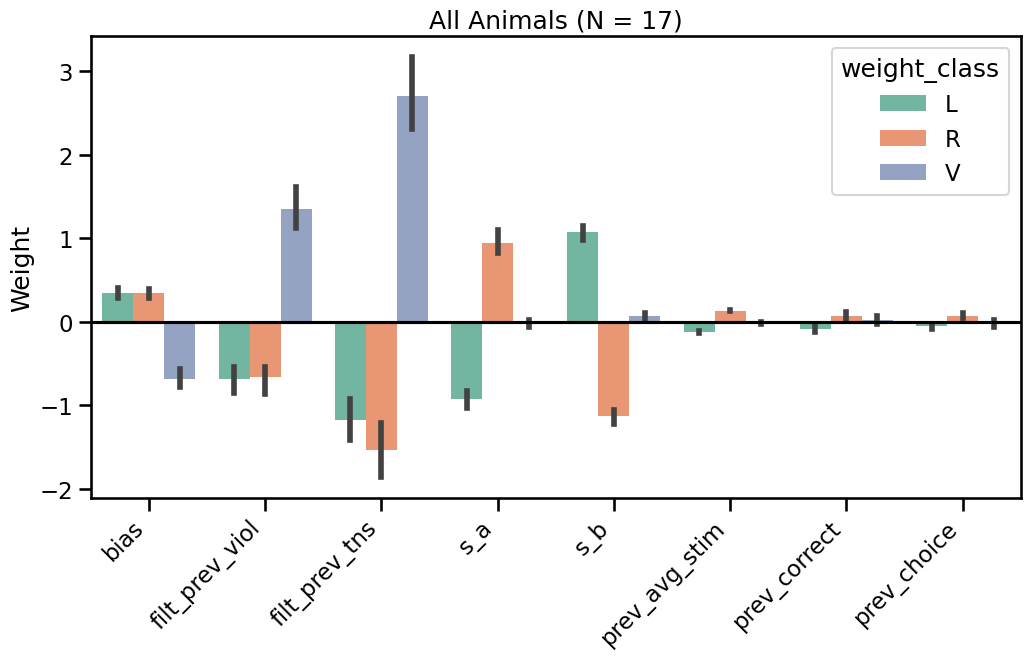

In [14]:
order = [
    "bias",
    "filt_prev_viol",
    "filt_prev_tns",
    "s_a",
    "s_b",
    "prev_avg_stim",
    "prev_correct",
    "prev_choice",
]
mvt.plot_weights_summary(palette="Set2", order=order)

/Users/jessbreda/anaconda3/envs/an_lrn/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.0, 100.0)

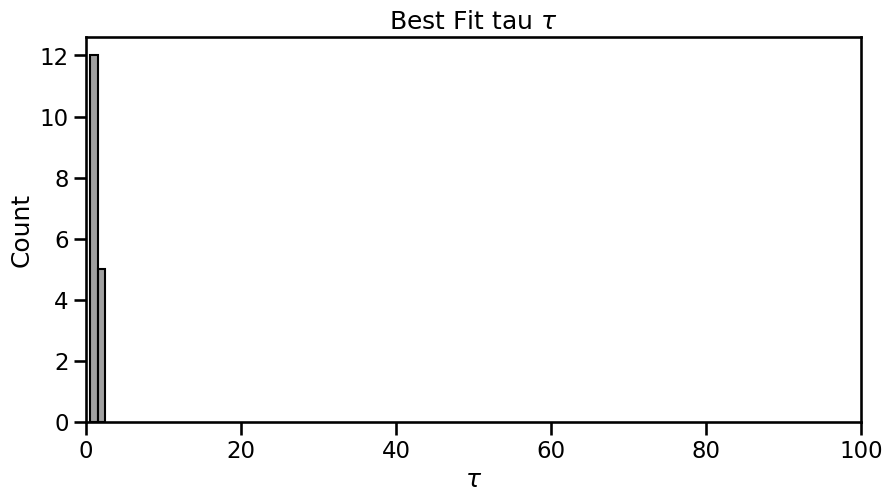

In [15]:
mvt.plot_tau_histogram(column="tau", binwidth=1)
plt.xlim(0, 100)

/Users/jessbreda/anaconda3/envs/an_lrn/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


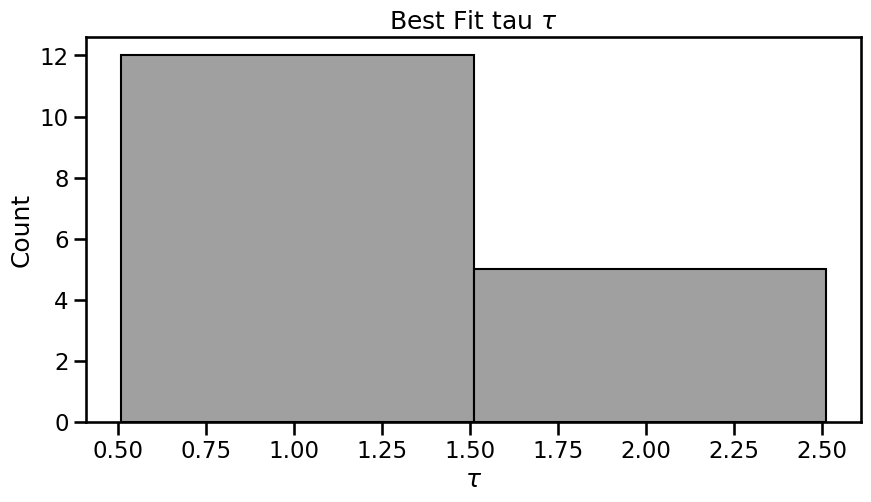

In [16]:
mvt.plot_tau_histogram(column="tau", binwidth=1)

In [17]:
exp = "2024_03_20_tau_sweep_prev_disengaged_binary.pkl"
tau_sweep = load_experiment(exp)
mvt = ModelVisualizerTauSweep(tau_sweep)

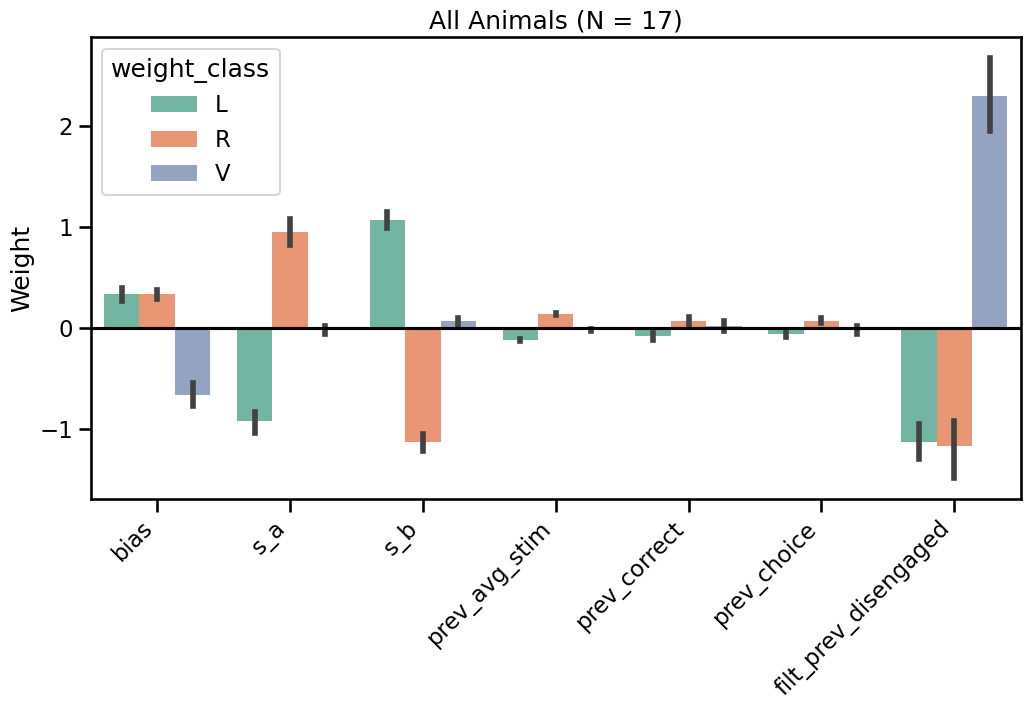

In [20]:
order = [
    "bias",
    "s_a",
    "s_b",
    "prev_avg_stim",
    "prev_correct",
    "prev_choice",
    "filt_prev_disengaged",
]
mvt.plot_weights_summary(palette="Set2", order=order)

In [21]:
taus_df = pd.read_csv("/Users/jessbreda/Desktop/github/animal-learning/data/processed/tau_sweeps/taus_df.csv")

In [27]:

plot_df = taus_df.melt(
    id_vars="animal_id",
    value_vars=["prev_violation_tau", "prev_tns_viol_combo_tau"],
    var_name="model",
    value_name="tau",
)

Text(0.5, 0, '')

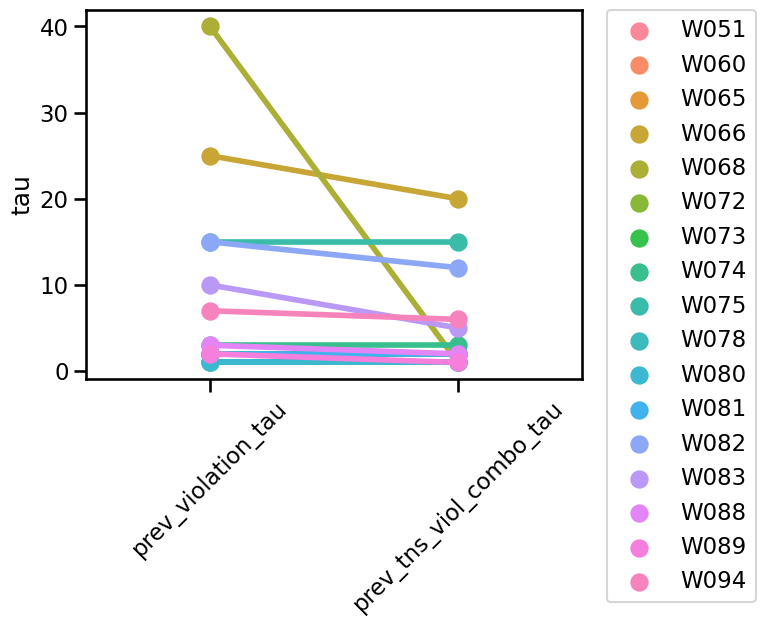

In [34]:
sns.pointplot(data=plot_df, x="model", y="tau", hue="animal_id")
# move legend outside of plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
# rotate x-axis labels
plt.xticks(rotation=45)
plt.xlabel("")